In [1]:
'''
Detecting Data Fraud Case Study
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_json('/home/david/Documents/temp/data.json')
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [3]:
df.acct_type.value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [4]:
#df.info()

In [5]:
df['fraud'] = np.where((df.acct_type == 'fraudster_event')
                       | (df.acct_type == 'fraudster')
                       | (df.acct_type == 'fraudster_att')
                       , 1
                       , 0
                      )
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,0
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,0
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,889,1283870102,3,,None,NaN,NaN,None,None,0
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,0


In [6]:
df.fraud.value_counts()

0    13044
1     1293
Name: fraud, dtype: int64

In [7]:
# downsample
df = df.groupby('fraud').apply(lambda x: x.sample(n=1293)).reset_index(drop=True)
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,premium,1301243400,3394,8,US,USD,0.0,"<p class=""MsoNormal"" style=""text-align: center...",chambermv.org,1296863177,...,487,1254762986,3,2098 W. El Camino Real,US,37.395835,-122.101627,Country Gourmet Restaurant,CA,0
1,premium,1301180400,638,12,US,USD,0.0,"<p><font face=""helvetica"" size=""3""><em><strong...",bresnan.net,1295569823,...,1,1295477017,3,1521 Grand Avenue,US,39.538784,-107.325134,Glenwood Springs High School,CO,0
2,premium,1368842400,14948,10,US,USD,1.0,"<p style=""color: #000000; text-align: center;""...",greatworldadventures.com,1365883904,...,1664,1222118948,3,8400 Manatee Ave W,US,27.496231,-82.643013,,,0
3,premium,1323145800,1473,8,US,USD,1.0,"<p>Thanksgiving will be over, Christmas will b...",samiari.net,1319589455,...,879,1243614611,4,20 E. Chestnut Street,US,41.898559,-87.627407,Le Bar (at Sofitel Chicago Water Tower),IL,0
4,premium,1317945600,951,8,GB,GBP,1.0,<p>This collaborative course run by osteopaths...,bso.ac.uk,1307719243,...,35,1304699073,3,275 Borough High Street,GB,51.500179,-0.094783,,,0


In [8]:
df.shape

(2586, 45)

In [9]:
df.fraud.value_counts()

1    1293
0    1293
Name: fraud, dtype: int64

In [10]:
df_fraud = df[df.fraud == 1]
df_fraud.shape

(1293, 45)

In [11]:
df_true = df[df.fraud != 1]
df_true.shape

(1293, 45)

In [12]:
df.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state',
       'fraud'],
      dtype='object')

In [13]:
df.iloc[3]


acct_type                                                       premium
approx_payout_date                                           1323145800
body_length                                                        1473
channels                                                              8
country                                                              US
currency                                                            USD
delivery_method                                                       1
description           <p>Thanksgiving will be over, Christmas will b...
email_domain                                                samiari.net
event_created                                                1319589455
event_end                                                    1322713800
event_published                                             1.32016e+09
event_start                                                  1322704800
fb_published                                                    

In [14]:
df.description.iloc[3] # use beautiful soup

'<p>Thanksgiving will be over, Christmas will be right around the corner and before we know it, we\'ll find ourselves at the end of another great year in Chicago. Join other fantastic Chicagoans on Twitter to celebrate the end of year. Come meet friends and make new ones!</p>\r\n<p>\xa0</p>\r\n<p>Of course, it wouldn\'t be a celebration without champagne! This is the perfect time to check-out Le Bar\'s Champagne Chic and enjoy bubbles and bites with great conversations about upcoming plans and the conclusion of 2011 without worrying about fitting it in 140 characters or less.</p>\r\n<p>Your admission includes a bubbly cocktail (or beer or wine, if you\'d prefer)!</p>\r\n<p>\xa0</p>\r\n<p>Get to know your host at @<a href="http://www.twitter.com/SofitelChicago" target="_blank">SofitelChicago</a> and <a href="https://www.facebook.com/SofitelChicago" target="_blank">Facebook.com/SofitelChicago</a> and follow our hashtag #<a href="http://twitter.com/#!/search/realtime/sofiteltweetup" targe

In [15]:
from bs4 import BeautifulSoup

In [16]:
soup = BeautifulSoup(df.description.iloc[0])

In [17]:
soup.find_all('p')[0].get_text()

'Join us\xa0to learn\xa0how being likeable can translate to big bucks in the business world!\xa0'

In [18]:
texts = []
for text in soup.find_all('p'):
    texts.append(text.get_text())

In [19]:
texts

['Join us\xa0to learn\xa0how being likeable can translate to big bucks in the business world!\xa0',
 "Let’s face it, there are some people we meet that we just don’t like. Is it you? Is it them?\xa0Most likely it's probably a combination of the two.\xa0 This\xa0presentation will give you tangible tools to fundamentally change the way you\xa0interact with others.\xa0We will discuss what it means to be likeable and how that can translate to big bucks in the business world. ",
 '\xa0',
 '\n\xa0Guest Speaker Catherine Toyooka is the founder of Catherine Coaches and is a blogger, sexuality speaker and educator, and a dating and sex coach helping busy professionals living in the Bay Area and beyond. Learn more about Catherine at www.catherinecoaches.com.\xa0 \n\n\n',
 '\xa0Guest Speaker Catherine Toyooka is the founder of Catherine Coaches and is a blogger, sexuality speaker and educator, and a dating and sex coach helping busy professionals living in the Bay Area and beyond. Learn more abou

In [20]:
text2_str = ' '.join(texts)
text2_str

'Join us\xa0to learn\xa0how being likeable can translate to big bucks in the business world!\xa0 Let’s face it, there are some people we meet that we just don’t like. Is it you? Is it them?\xa0Most likely it\'s probably a combination of the two.\xa0 This\xa0presentation will give you tangible tools to fundamentally change the way you\xa0interact with others.\xa0We will discuss what it means to be likeable and how that can translate to big bucks in the business world.  \xa0 \n\xa0Guest Speaker Catherine Toyooka is the founder of Catherine Coaches and is a blogger, sexuality speaker and educator, and a dating and sex coach helping busy professionals living in the Bay Area and beyond. Learn more about Catherine at www.catherinecoaches.com.\xa0 \n\n\n \xa0Guest Speaker Catherine Toyooka is the founder of Catherine Coaches and is a blogger, sexuality speaker and educator, and a dating and sex coach helping busy professionals living in the Bay Area and beyond. Learn more about Catherine at w

### Make a function to convert description into string

In [21]:
def to_string(des):
    
    from bs4 import BeautifulSoup
    import string, re
    from num2words import num2words as n2w # may have to download this, terminal: pip3 install num2words
    
    soup = BeautifulSoup(des)
    texts = []
    for text in soup.find_all('p'): # gets all the words in paragraphs 
        texts.append(text.get_text())
    texts = ' '.join(texts).lower() # joins sentences together into one long paragraphs
    texts = texts.replace('$', 'dollar ') # change $ symbole to 'dollar'
    texts = re.split(r'\W+', texts) # keeps all the words and numbers only, drops all symbol characters 
    
    new_words = []
    for word in texts: 
        if word[-2:] == 'am' or word[-2:] == 'pm': # split am and pm from numbers
            new_words.append(word[:-2]) 
            new_words.append(word[-2:])
        else:
            new_words.append(word)
    
    texts = new_words
    
    new_words = []
    for word in texts:
        if word.isdigit(): # changes numbers into words 200 becomes two hundred 
            new_words.append(n2w(int(word)))
        else:
            new_words.append(word)
            
    texts = new_words
    
    new_words = []
    for word in texts:
        if ' ' in word:
            new_words.extend(word.split(' '))
        else:
            new_words.append(word)
    
    return ' '.join(new_words)

In [22]:
to_string(df.description.iloc[2])

'visit bradenton the world famous birthplace of horsesurfing experience year round horseback riding on the beach horsesurfing swimming with horses looking for fun things to do in florida experience everything that makes florida one of the world s most popular vacation destinations frequently asked questions i don t see tickets available on the day time when i want to ride should i call you to ask if there are any other activies yes we now have tickets available for other activities that you may enjoy please call us at nine hundred and forty-one nine hundred and seven seven thousand, two hundred and seventy-two who can participate in the beach experience almost anyone can do this because we can adjust the ride depending on your capabilities we make it fun for beginners and expert riders alike children as young as three years of age can participate we welcome the disabled our only restriction is that you must weigh under three hundred lbs sorry no exceptions most of our horses are limite

In [23]:
# text2 = to_string(df.description.iloc[2]).lower()
# text2

In [24]:
# text2 = text2.replace('$', 'dollar ')
# text2

In [25]:
# import re
# words = re.split(r'\W+', text2)
# words

In [26]:
# new_words = []
# for word in words:
#     if word[-2:] == 'am' or word[-2:] == 'pm':
#         new_words.append(word[:-2])
#         new_words.append(word[-2:])
#     else:
#         new_words.append(word)
# new_words

In [27]:
# from num2words import num2words as n2w

# new_words_text_only = []
# for word in new_words:
#     if word.isdigit():
#         new_words_text_only.append(n2w(int(word)))
#     else:
#         new_words_text_only.append(word)
# new_words_text_only

In [28]:
# final_word_lst = []
# for word in new_words_text_only:
#     if ' ' in word:
#         final_word_lst.extend(word.split(' '))
#     else:
#         final_word_lst.append(word)
# final_word_lst

In [29]:
string_only = ''.join(to_string(df.description.iloc[2]))
string_only

'visit bradenton the world famous birthplace of horsesurfing experience year round horseback riding on the beach horsesurfing swimming with horses looking for fun things to do in florida experience everything that makes florida one of the world s most popular vacation destinations frequently asked questions i don t see tickets available on the day time when i want to ride should i call you to ask if there are any other activies yes we now have tickets available for other activities that you may enjoy please call us at nine hundred and forty-one nine hundred and seven seven thousand, two hundred and seventy-two who can participate in the beach experience almost anyone can do this because we can adjust the ride depending on your capabilities we make it fun for beginners and expert riders alike children as young as three years of age can participate we welcome the disabled our only restriction is that you must weigh under three hundred lbs sorry no exceptions most of our horses are limite

In [30]:
letter_dict = {}
for letter in string_only:
    if letter in letter_dict:
        letter_dict[letter] += 1
    else:
        letter_dict[letter] = 1


vals = []
for x in letter_dict.values():
    vals.append(x)


first_vals_dict = {}
for x in vals:
    if int(str(x)[0]) in first_vals_dict:
        first_vals_dict[int(str(x)[0])] += 1
    else:
        first_vals_dict[int(str(x)[0])] = 1

sorted_firsts = sorted(first_vals_dict.items())
sorted_firsts

[(1, 8), (2, 5), (3, 2), (4, 5), (5, 3), (7, 1), (8, 1), (9, 3)]

In [31]:
x = [x[0] for x in sorted_firsts]
y = [x[1] for x in sorted_firsts]
print(x)
print(y) # use this as a table to model 

[1, 2, 3, 4, 5, 7, 8, 9]
[8, 5, 2, 5, 3, 1, 1, 3]


In [32]:
# look up different ways to normalize: min, max
# look up: log trap. area under the curve rules 

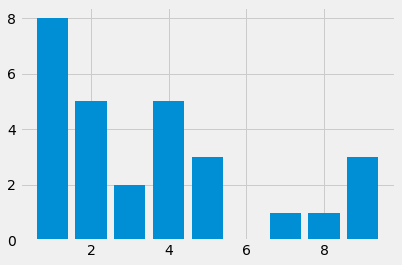

In [33]:
plt.bar(x,y);

In [34]:
lst_firsts = []
for i in range(len(x)):
    for itr in range(y[i]):
        lst_firsts.append(x[i])
lst_firsts

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 7,
 8,
 9,
 9,
 9]

In [35]:
def median(lst):
    n = len(lst)
    if n%2 == 0:
        return round((lst[n//2 -1] + lst[n//2])/2, 1)
    else: 
        return lst[n//2]

In [36]:
median(lst_firsts)

3.0

In [37]:
to_string(df.description.iloc[2])

'visit bradenton the world famous birthplace of horsesurfing experience year round horseback riding on the beach horsesurfing swimming with horses looking for fun things to do in florida experience everything that makes florida one of the world s most popular vacation destinations frequently asked questions i don t see tickets available on the day time when i want to ride should i call you to ask if there are any other activies yes we now have tickets available for other activities that you may enjoy please call us at nine hundred and forty-one nine hundred and seven seven thousand, two hundred and seventy-two who can participate in the beach experience almost anyone can do this because we can adjust the ride depending on your capabilities we make it fun for beginners and expert riders alike children as young as three years of age can participate we welcome the disabled our only restriction is that you must weigh under three hundred lbs sorry no exceptions most of our horses are limite

### TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
words1 = to_string(df.description.iloc[2])
words2 = to_string(df.description.iloc[3])
words3 = to_string(df.description.iloc[4])

In [40]:
word_lst = [words1
            , words2
            , words3
           ]
tf_model = TfidfVectorizer()
vectors = tf_model.fit_transform(word_lst)
vectors[0].T.todense()

matrix([[0.00576524],
        [0.0097614 ],
        [0.0097614 ],
        [0.0097614 ],
        [0.0097614 ],
        [0.0097614 ],
        [0.0097614 ],
        [0.        ],
        [0.0097614 ],
        [0.01952279],
        [0.0097614 ],
        [0.        ],
        [0.02928419],
        [0.        ],
        [0.0097614 ],
        [0.0097614 ],
        [0.02928419],
        [0.0097614 ],
        [0.0097614 ],
        [0.        ],
        [0.0097614 ],
        [0.03711896],
        [0.0097614 ],
        [0.01952279],
        [0.0097614 ],
        [0.        ],
        [0.01952279],
        [0.01952279],
        [0.03459142],
        [0.28249662],
        [0.01484759],
        [0.03711896],
        [0.0097614 ],
        [0.0097614 ],
        [0.27331906],
        [0.0097614 ],
        [0.00742379],
        [0.        ],
        [0.01952279],
        [0.01952279],
        [0.0097614 ],
        [0.        ],
        [0.        ],
        [0.0097614 ],
        [0.06341761],
        [0

In [41]:
df['desc_string'] = df.description.apply(to_string)

In [42]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud,desc_string
0,premium,1301243400,3394,8,US,USD,0.0,"<p class=""MsoNormal"" style=""text-align: center...",chambermv.org,1296863177,...,1254762986,3,2098 W. El Camino Real,US,37.395835,-122.101627,Country Gourmet Restaurant,CA,0,join us to learn how being likeable can transl...
1,premium,1301180400,638,12,US,USD,0.0,"<p><font face=""helvetica"" size=""3""><em><strong...",bresnan.net,1295569823,...,1295477017,3,1521 Grand Avenue,US,39.538784,-107.325134,Glenwood Springs High School,CO,0,wednesday march 23rd seven thirty p m glenwood...
2,premium,1368842400,14948,10,US,USD,1.0,"<p style=""color: #000000; text-align: center;""...",greatworldadventures.com,1365883904,...,1222118948,3,8400 Manatee Ave W,US,27.496231,-82.643013,,,0,visit bradenton the world famous birthplace of...
3,premium,1323145800,1473,8,US,USD,1.0,"<p>Thanksgiving will be over, Christmas will b...",samiari.net,1319589455,...,1243614611,4,20 E. Chestnut Street,US,41.898559,-87.627407,Le Bar (at Sofitel Chicago Water Tower),IL,0,thanksgiving will be over christmas will be ri...
4,premium,1317945600,951,8,GB,GBP,1.0,<p>This collaborative course run by osteopaths...,bso.ac.uk,1307719243,...,1304699073,3,275 Borough High Street,GB,51.500179,-0.094783,,,0,this collaborative course run by osteopaths dr...


In [43]:
df.desc_string.iloc[0]

'join us to learn how being likeable can translate to big bucks in the business world let s face it there are some people we meet that we just don t like is it you is it them most likely it s probably a combination of the two this presentation will give you tangible tools to fundamentally change the way you interact with others we will discuss what it means to be likeable and how that can translate to big bucks in the business world guest speaker catherine toyooka is the founder of catherine coaches and is a blogger sexuality speaker and educator and a dating and sex coach helping busy professionals living in the bay area and beyond learn more about catherine at www catherinecoaches com guest speaker catherine toyooka is the founder of catherine coaches and is a blogger sexuality speaker and educator and a dating and sex coach helping busy professionals living in the bay area and beyond learn more about catherine at www catherinecoaches com morning buzz a professional learning series i

In [44]:
# the following needs up to 55.5 gbs of memory!
# this is the reson for downsampling 

In [45]:
tf_model = TfidfVectorizer()
row_vectors = tf_model.fit_transform(df.desc_string)

word_columns = tf_model.get_feature_names()

dense = row_vectors.todense()

dense_list = dense.tolist()


In [46]:
df_tfidf = pd.DataFrame(dense_list, columns = word_columns)

In [47]:
df_tfidf.shape

(2586, 27515)

In [48]:
df

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud,desc_string
0,premium,1301243400,3394,8,US,USD,0.0,"<p class=""MsoNormal"" style=""text-align: center...",chambermv.org,1296863177,...,1254762986,3,2098 W. El Camino Real,US,37.395835,-122.101627,Country Gourmet Restaurant,CA,0,join us to learn how being likeable can transl...
1,premium,1301180400,638,12,US,USD,0.0,"<p><font face=""helvetica"" size=""3""><em><strong...",bresnan.net,1295569823,...,1295477017,3,1521 Grand Avenue,US,39.538784,-107.325134,Glenwood Springs High School,CO,0,wednesday march 23rd seven thirty p m glenwood...
2,premium,1368842400,14948,10,US,USD,1.0,"<p style=""color: #000000; text-align: center;""...",greatworldadventures.com,1365883904,...,1222118948,3,8400 Manatee Ave W,US,27.496231,-82.643013,,,0,visit bradenton the world famous birthplace of...
3,premium,1323145800,1473,8,US,USD,1.0,"<p>Thanksgiving will be over, Christmas will b...",samiari.net,1319589455,...,1243614611,4,20 E. Chestnut Street,US,41.898559,-87.627407,Le Bar (at Sofitel Chicago Water Tower),IL,0,thanksgiving will be over christmas will be ri...
4,premium,1317945600,951,8,GB,GBP,1.0,<p>This collaborative course run by osteopaths...,bso.ac.uk,1307719243,...,1304699073,3,275 Borough High Street,GB,51.500179,-0.094783,,,0,this collaborative course run by osteopaths dr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,fraudster_event,1358506800,6483,0,GB,GBP,0.0,"<p style=""margin: 0px; padding: 0px 0px 8px; f...",hotmail.co.uk,1357236530,...,1351353159,4,99 Kensington High St,GB,51.497321,-0.203833,Kensington Roof Gardens,London,1,styleparties have the pleasure to be hosting p...
2582,fraudster_event,1354838400,2805,8,CA,CAD,1.0,"<p><span style=""font-family: arial black,avant...",diversity-church.com,1341189474,...,1341189473,1,Blow The Whistle On Bullying ~ It Matters Wha...,,0.000000,0.000000,Blow The Whistle On Bullying ~ It Matters What...,,1,wrap with pride is a campaign to help stop vio...
2583,fraudster_event,1353117600,4266,8,CA,USD,0.0,"<p><span style=""color: #333333; font-family: '...",gmail.com,1352546222,...,1352546217,1,"111 E 48th St, New York, NY 10017",US,40.755637,-73.973622,InterContinental New York Barclay,NY,1,the purpose of the event invite family adults ...
2584,fraudster,1335501000,190,6,US,USD,0.0,<p>Join Building Twentyone for our first Comed...,aol.com,1334335206,...,1334335197,1,2289 Cedar Street,US,42.648408,-84.525414,Building Twentyone,MI,1,join building twentyone for our first comedy w...


In [49]:
df_tfidf.shape

(2586, 27515)

In [50]:
df.shape

(2586, 46)

In [51]:
df_tfidf = df_tfidf.assign(f = df.fraud)

In [52]:
df_tfidf.shape

(2586, 27516)

In [53]:
df_tfidf

,00a,00amlearn,00amnfci,00amplace,00amselling,00amtrystan,00amwhere,00amwith,00birthday,00date,...,định,động,œuvre,œuvres,кааждому,хелијумgiuseppe,周育潤chou,曾熙凱,陳函谿,f
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [54]:
df_tfidf = df_tfidf.sample(frac=1)

In [55]:
df_tfidf

,00a,00amlearn,00amnfci,00amplace,00amselling,00amtrystan,00amwhere,00amwith,00birthday,00date,...,định,động,œuvre,œuvres,кааждому,хелијумgiuseppe,周育潤chou,曾熙凱,陳函谿,f
665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Random Forest Classifier

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = df_tfidf.drop('f', axis=1)
y = df_tfidf.f
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size = 0.25
                                                    , random_state = 42
                                                   )

In [58]:
X_train.shape

(1939, 27515)

In [59]:
X_test.shape

(647, 27515)

In [60]:
y_train.shape

(1939,)

In [61]:
y_test.shape

(647,)

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf_model = RandomForestClassifier(n_estimators = 199
                                  , bootstrap = True
                                  , max_features = 'sqrt'
                                 )

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=199)

In [64]:
yhat = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

In [65]:
# ROC AUC Score

from sklearn.metrics import roc_auc_score

roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.8372824631860776

In [66]:
# feature importances

fi = pd.DataFrame({'word': list(X_train.columns)
                   , 'importance': rf_model.feature_importances_
                  }
                 ).sort_values('importance', ascending = False)
fi.head()

,word,importance
24857,to,0.010344
1523,and,0.008856
24530,the,0.008838
9889,for,0.007963
2112,at,0.007330


In [67]:
# To Do: Need to Filter out Stop words, upsample 

### Check for Benford's Distribution

In [68]:

body_lengths_true = df_true.body_length.values
int(str(body_lengths_true[1])[0])

6

In [69]:
body_lengths_true_first = [int(str(x)[0]) for x in body_lengths_true]

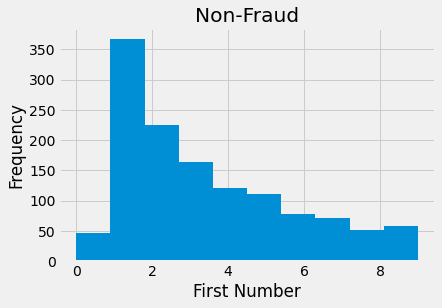

In [70]:
plt.hist(body_lengths_true_first)
plt.ylabel('Frequency')
plt.xlabel('First Number')
plt.title('Non-Fraud');

In [71]:
body_lengths_fraud = df_fraud.body_length.values
body_lengths_fraud_first = [int(str(x)[0]) for x in body_lengths_fraud]

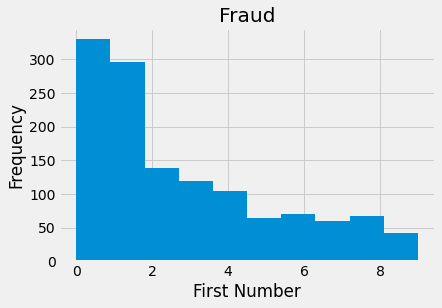

In [72]:
plt.hist(body_lengths_fraud_first)
plt.ylabel('Frequency')
plt.xlabel('First Number')
plt.title('Fraud');

In [73]:
# class imbalance, do over or under sampling. 
# vectorize the words and then add body length to train model 
# use tf-idf, count vectorizer to train the model 